In [1]:
from utils import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
seed = 42
data = datasets.make_electricity_data("2016-01-01", "2024-01-01", freq="15min", random_state=seed)
print(f"Dataset size: {(data.size / 2**20):.2f} MiB")
display(data)
data.describe()

Dataset size: 1.61 MiB


,electricity,wind_speed,wind_speed_no_seasonality,daily_seasonality,weekly_seasonality,yearly_seasonality
time,,,,,,
2016-01-01 00:00:00,6.483324,8.096485,8.993428,0.000000,-0.433884,1.721336e-02
2016-01-01 00:15:00,4.483490,6.490207,7.723471,0.000000,-0.433884,1.721336e-02
2016-01-01 00:30:00,6.547557,8.182114,9.295377,0.000000,-0.433884,1.721336e-02
2016-01-01 00:45:00,12.003012,9.817233,11.046060,0.000000,-0.433884,1.721336e-02
2016-01-01 01:00:00,4.921916,7.602077,7.531693,0.258819,-0.433884,1.721336e-02
...,...,...,...,...,...,...
2023-12-31 22:45:00,2.174460,5.036877,8.228670,-0.500000,-0.781831,6.432491e-16
2023-12-31 23:00:00,3.415167,6.322062,8.085556,-0.258819,-0.781831,6.432491e-16
2023-12-31 23:15:00,6.248257,7.947281,10.530174,-0.258819,-0.781831,6.432491e-16


,electricity,wind_speed,wind_speed_no_seasonality,daily_seasonality,weekly_seasonality,yearly_seasonality
count,280512.000000,280512.000000,280512.000000,2.805120e+05,280512.000000,2.805120e+05
mean,8.349355,8.037598,8.000369,-3.799531e-20,-0.000750,1.178190e-05
std,7.312911,4.247603,1.999790,7.071080e-01,0.707168,7.068661e-01
min,0.000029,0.000000,-0.931208,-1.000000e+00,-0.974928,-9.999907e-01
25%,2.477795,4.924710,6.651508,-7.071068e-01,-0.781831,-7.055836e-01
50%,6.431924,7.999515,8.000548,6.123234e-17,0.000000,6.432491e-16
75%,12.297401,11.065101,9.349738,7.071068e-01,0.781831,7.055836e-01
max,58.620814,24.176191,17.124229,1.000000e+00,0.974928,9.999907e-01


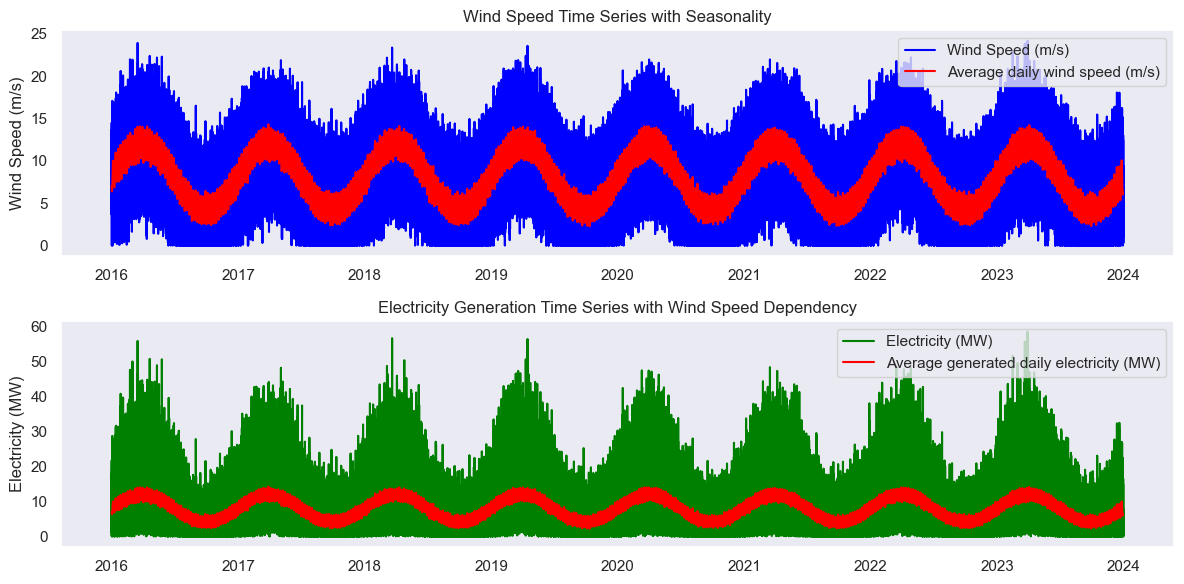

In [3]:
daily_data = data.resample("d").mean()
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.index, data["wind_speed"], label="Wind Speed (m/s)", color="blue")
plt.title("Wind Speed Time Series with Seasonality")
plt.ylabel("Wind Speed (m/s)")
plt.plot(daily_data.index, daily_data.wind_speed, label="Average daily wind speed (m/s)", color="red")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(data.index, data["electricity"], label="Electricity (MW)", color="green")
plt.title("Electricity Generation Time Series with Wind Speed Dependency")
plt.ylabel("Electricity (MW)")
plt.plot(daily_data.index, daily_data.wind_speed, label="Average generated daily electricity (MW)", color="red")
plt.legend()
plt.grid()

plt.tight_layout()


<Axes: xlabel='electricity'>

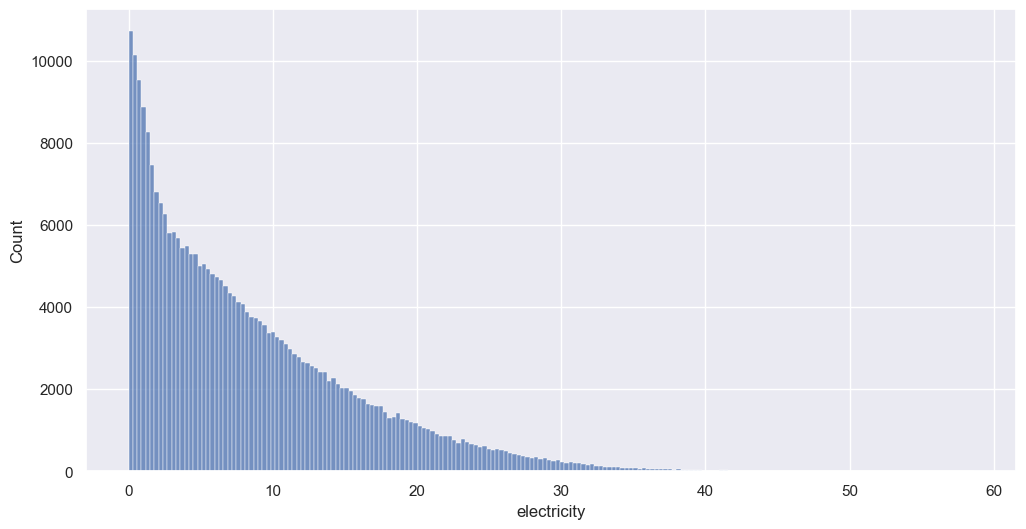

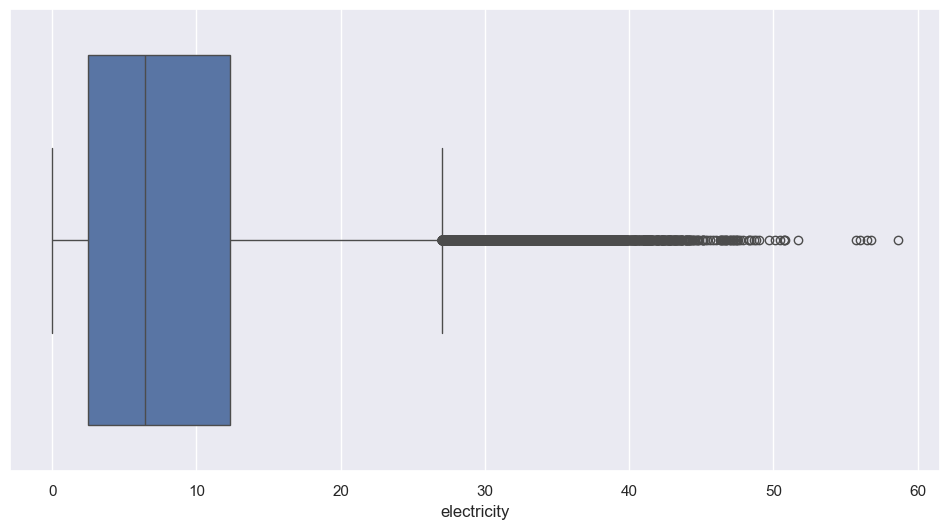

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(data, x="electricity");

plt.figure(figsize=(12, 6))
sns.boxplot(data, x="electricity")